<a href="https://colab.research.google.com/github/sajaltandon/OralGuard-AI/blob/main/OralGuardAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **`IMPORTING LIBRARIES`**

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# **`Uploading Dataset`**

In [ ]:
base_dir = "C:\\Users\\sajal\\Desktop\\dental project materials\\dataset_dental_project"


# **`Defining the Model`**

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam


# **`Compiling the Model`**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121


base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


base_model.trainable = False


model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation='softmax')  # 6 classes
])


model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.MeanSquaredError(name='mse'),
        tf.keras.metrics.CosineSimilarity(name='cosine_similarity')
    ]
)


# **`Training (Epoche 1-30)`**

In [ ]:


# Train the model
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator
)


loss, accuracy, precision, recall, auc, mse, cosine_similarity = model.evaluate(validation_generator)

print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')
print(f'Validation Precision: {precision}')
print(f'Validation Recall: {recall}')
print(f'Validation AUC: {auc}')
print(f'Validation MSE: {mse}')
print(f'Validation Cosine Similarity: {cosine_similarity}')


Epoch 1/30
292/292 [==============================] - 156s 503ms/step - loss: 1.9935 - accuracy: 0.4320 - precision: 0.5000 - recall: 0.2848 - auc: 0.7540 - mse: 0.1275 - cosine_similarity: 0.5240 - val_loss: 1.0634 - val_accuracy: 0.6190 - val_precision: 0.7753 - val_recall: 0.2994 - val_auc: 0.8943 - val_mse: 0.0895 - val_cosine_similarity: 0.6695
Epoch 2/30
292/292 [==============================] - 143s 491ms/step - loss: 1.1043 - accuracy: 0.5709 - precision: 0.6619 - recall: 0.4191 - auc: 0.8781 - mse: 0.0939 - cosine_similarity: 0.6523 - val_loss: 0.9631 - val_accuracy: 0.6220 - val_precision: 0.8431 - val_recall: 0.3162 - val_auc: 0.9183 - val_mse: 0.0837 - val_cosine_similarity: 0.6959
Epoch 3/30
292/292 [==============================] - 143s 489ms/step - loss: 1.0109 - accuracy: 0.5957 - precision: 0.6854 - recall: 0.4688 - auc: 0.8973 - mse: 0.0882 - cosine_similarity: 0.6761 - val_loss: 0.8471 - val_accuracy: 0.6877 - val_precision: 0.7981 - val_recall: 0.4974 - val_auc: 0

# **`Training (Epoche 31-45)`**

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Define callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', 'Precision', 'Recall', 'AUC', 'MSE', 'CosineSimilarity'])


history = model.fit(
    train_generator,
    initial_epoch=30,  # Start from epoch 31
    epochs=60,         # Train for additional 30 epochs
    validation_data=validation_generator,
    callbacks=[reduce_lr, early_stopping]
)


loss, accuracy, precision, recall, auc, mse, cosine_similarity = model.evaluate(validation_generator)

print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')
print(f'Validation Precision: {precision}')
print(f'Validation Recall: {recall}')
print(f'Validation AUC: {auc}')
print(f'Validation MSE: {mse}')
print(f'Validation Cosine Similarity: {cosine_similarity}')


Epoch 31/60
292/292 [==============================] - 159s 514ms/step - loss: 0.6164 - accuracy: 0.7555 - precision: 0.7896 - recall: 0.7123 - auc: 0.9606 - MSE: 0.0558 - cosine_similarity: 0.8044 - val_loss: 0.9592 - val_accuracy: 0.7921 - val_precision: 0.8109 - val_recall: 0.7444 - val_auc: 0.9343 - val_MSE: 0.0584 - val_cosine_similarity: 0.8086 - lr: 0.0010
Epoch 32/60
292/292 [==============================] - 145s 497ms/step - loss: 0.5866 - accuracy: 0.7669 - precision: 0.8058 - recall: 0.7221 - auc: 0.9638 - MSE: 0.0533 - cosine_similarity: 0.8134 - val_loss: 0.7348 - val_accuracy: 0.7822 - val_precision: 0.8347 - val_recall: 0.6787 - val_auc: 0.9476 - val_MSE: 0.0583 - val_cosine_similarity: 0.8047 - lr: 0.0010
Epoch 33/60
292/292 [==============================] - 144s 493ms/step - loss: 0.5799 - accuracy: 0.7647 - precision: 0.8101 - recall: 0.7166 - auc: 0.9645 - MSE: 0.0528 - cosine_similarity: 0.8146 - val_loss: 0.8004 - val_accuracy: 0.7118 - val_precision: 0.7539 - va

# **`Training (Epoche 46-52)`**

In [ ]:

history = model.fit(
    train_generator,
    initial_epoch=45,
    epochs=60,
    validation_data=validation_generator,
    callbacks=[reduce_lr, early_stopping]
)


Epoch 46/60
292/292 [==============================] - 145s 495ms/step - loss: 0.5104 - accuracy: 0.8015 - precision: 0.8423 - recall: 0.7515 - auc: 0.9721 - MSE: 0.0463 - cosine_similarity: 0.8399 - val_loss: 0.7586 - val_accuracy: 0.8170 - val_precision: 0.8518 - val_recall: 0.7483 - val_auc: 0.9495 - val_MSE: 0.0521 - val_cosine_similarity: 0.8292 - lr: 2.0000e-04
Epoch 47/60
292/292 [==============================] - 146s 501ms/step - loss: 0.4932 - accuracy: 0.8059 - precision: 0.8397 - recall: 0.7615 - auc: 0.9740 - MSE: 0.0453 - cosine_similarity: 0.8426 - val_loss: 0.7513 - val_accuracy: 0.8183 - val_precision: 0.8510 - val_recall: 0.7285 - val_auc: 0.9495 - val_MSE: 0.0522 - val_cosine_similarity: 0.8289 - lr: 2.0000e-04
Epoch 48/60
292/292 [==============================] - 145s 495ms/step - loss: 0.4850 - accuracy: 0.8068 - precision: 0.8428 - recall: 0.7604 - auc: 0.9747 - MSE: 0.0448 - cosine_similarity: 0.8438 - val_loss: 0.7895 - val_accuracy: 0.8192 - val_precision: 0.8

# **`Training (Epoche 53-59)`**

In [ ]:

history = model.fit(
    train_generator,
    initial_epoch=52,
    epochs=60,
    validation_data=validation_generator,
    callbacks=[reduce_lr, early_stopping]
)

Epoch 53/60
292/292 [==============================] - 147s 503ms/step - loss: 0.4796 - accuracy: 0.8064 - precision: 0.8416 - recall: 0.7601 - auc: 0.9753 - MSE: 0.0446 - cosine_similarity: 0.8447 - val_loss: 0.7522 - val_accuracy: 0.8144 - val_precision: 0.8496 - val_recall: 0.7328 - val_auc: 0.9497 - val_MSE: 0.0520 - val_cosine_similarity: 0.8295 - lr: 1.0000e-04
Epoch 54/60
292/292 [==============================] - 145s 495ms/step - loss: 0.4743 - accuracy: 0.8080 - precision: 0.8445 - recall: 0.7653 - auc: 0.9756 - MSE: 0.0438 - cosine_similarity: 0.8472 - val_loss: 0.7406 - val_accuracy: 0.8192 - val_precision: 0.8517 - val_recall: 0.7500 - val_auc: 0.9507 - val_MSE: 0.0511 - val_cosine_similarity: 0.8326 - lr: 1.0000e-04
Epoch 55/60
292/292 [==============================] - 144s 493ms/step - loss: 0.4620 - accuracy: 0.8136 - precision: 0.8448 - recall: 0.7734 - auc: 0.9766 - MSE: 0.0428 - cosine_similarity: 0.8516 - val_loss: 0.7654 - val_accuracy: 0.8149 - val_precision: 0.8

# **`Training (Last Epoche)`**

In [ ]:

history = model.fit(
    train_generator,
    initial_epoch=59,
    epochs=60,
    validation_data=validation_generator,
    callbacks=[reduce_lr, early_stopping]
)

Epoch 60/60
292/292 [==============================] - 146s 499ms/step - loss: 0.4813 - accuracy: 0.8082 - precision: 0.8414 - recall: 0.7613 - auc: 0.9750 - MSE: 0.0445 - cosine_similarity: 0.8450 - val_loss: 0.7476 - val_accuracy: 0.8187 - val_precision: 0.8486 - val_recall: 0.7461 - val_auc: 0.9501 - val_MSE: 0.0514 - val_cosine_similarity: 0.8315 - lr: 1.0000e-04


# **`Trainable and Non-trainable parameters`**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121

# Load DenseNet121 model without top (fully connected layers)
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the base model
base_model.trainable = False

# Print summary of the base model
print("Base Model Summary:")
base_model.summary()

# Calculate number of trainable and non-trainable parameters
trainable_params = sum([tf.keras.backend.count_params(w) for w in base_model.trainable_weights])
non_trainable_params = sum([tf.keras.backend.count_params(w) for w in base_model.non_trainable_weights])

print(f'\nTotal params: {trainable_params + non_trainable_params}')
print(f'Trainable params: {trainable_params}')
print(f'Non-trainable params: {non_trainable_params}')

# Print out all trainable parameters with their shapes
print("\nTrainable Parameters:")
for layer in base_model.trainable_weights:
    print(f"{layer.name} \t {layer.shape}")

# Print out all non-trainable parameters with their shapes
print("\nNon-Trainable Parameters:")
for layer in base_model.non_trainable_weights:
    print(f"{layer.name} \t {layer.shape}")


Base Model Summary:
Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_11 (InputLayer)       [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 zero_padding2d_20 (ZeroPad  (None, 156, 156, 3)          0         ['input_11[0][0]']            
 ding2D)                                                                                          
                                                                                                  
 conv1/conv (Conv2D)         (None, 75, 75, 64)           9408      ['zero_padding2d_20[0][0]']   
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 75, 75, 64)           256       

# **`Plotting the graphs for evaluation metrics`**

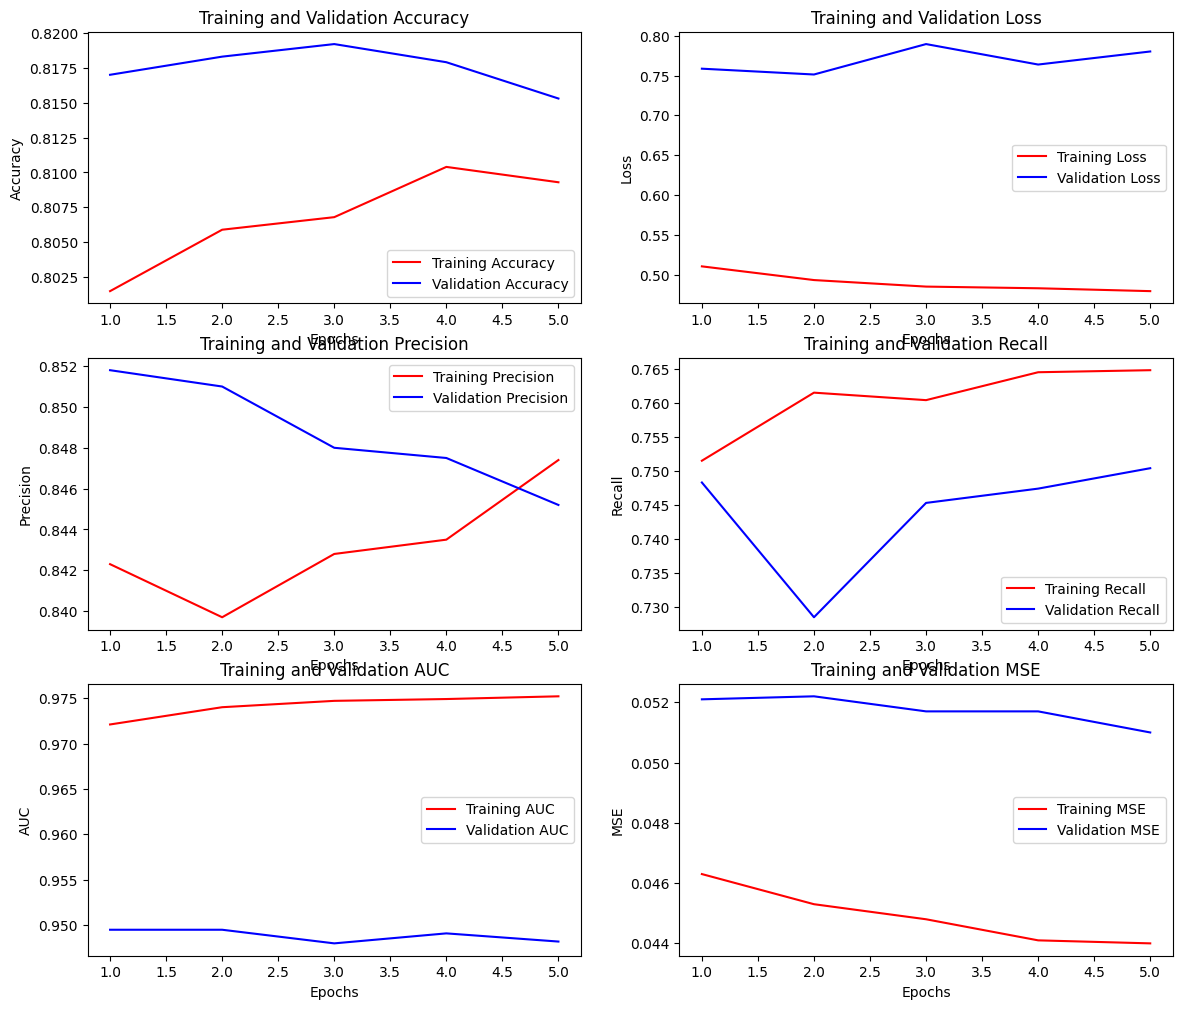

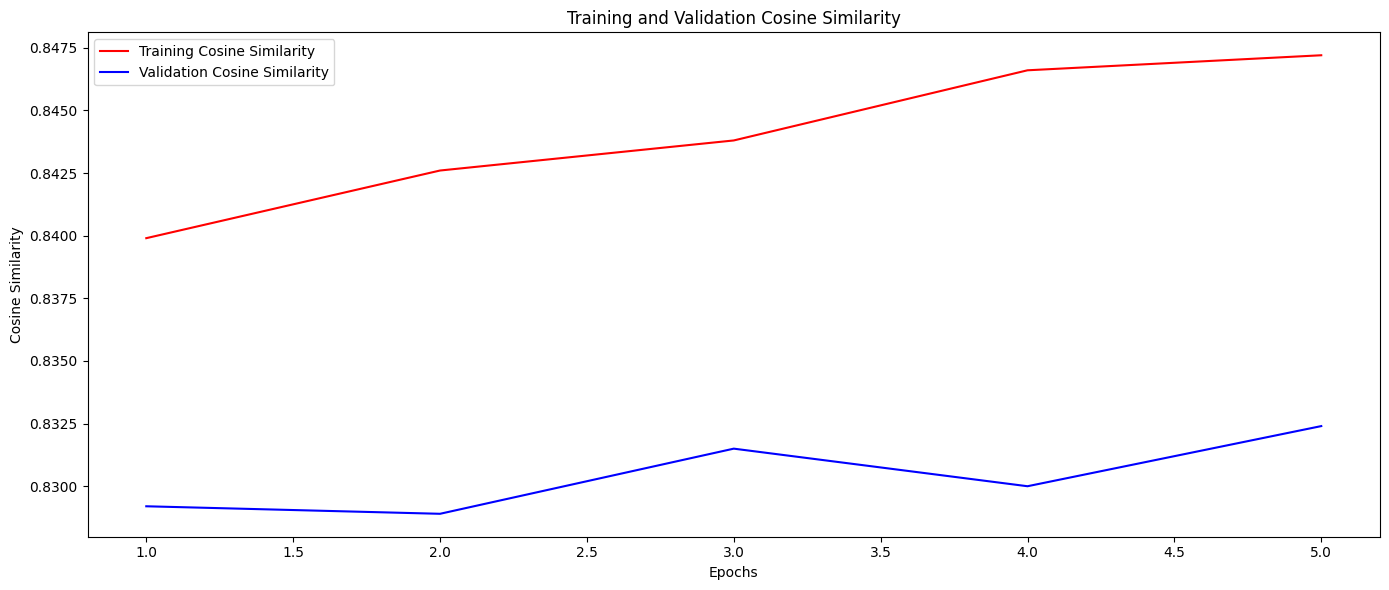


Metrics:
   Accuracy  Val Accuracy    Loss  Val Loss  Precision  Val Precision  Recall  \
0    0.8015        0.8170  0.5104    0.7586     0.8423         0.8518  0.7515   
1    0.8059        0.8183  0.4932    0.7513     0.8397         0.8510  0.7615   
2    0.8068        0.8192  0.4850    0.7895     0.8428         0.8480  0.7604   
3    0.8104        0.8179  0.4829    0.7638     0.8435         0.8475  0.7645   
4    0.8093        0.8153  0.4793    0.7802     0.8474         0.8452  0.7648   

   Val Recall     AUC  Val AUC     MSE  Val MSE  Cosine Similarity  \
0      0.7483  0.9721   0.9495  0.0463   0.0521             0.8399   
1      0.7285  0.9740   0.9495  0.0453   0.0522             0.8426   
2      0.7453  0.9747   0.9480  0.0448   0.0517             0.8438   
3      0.7474  0.9749   0.9491  0.0441   0.0517             0.8466   
4      0.7504  0.9752   0.9482  0.0440   0.0510             0.8472   

   Val Cosine Similarity  
0                 0.8292  
1                 0.8289  
2

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_history(history):
    acc = history['accuracy']
    val_acc = history['val_accuracy']
    loss = history['loss']
    val_loss = history['val_loss']
    precision = history['precision']
    val_precision = history['val_precision']
    recall = history['recall']
    val_recall = history['val_recall']
    auc = history['auc']
    val_auc = history['val_auc']
    mse = history['mse']
    val_mse = history['val_mse']


    if 'cosine_similarity' in history:
        cosine_similarity = history['cosine_similarity']
        val_cosine_similarity = history['val_cosine_similarity']
    else:
        cosine_similarity = None
        val_cosine_similarity = None

    epochs = range(1, len(acc) + 1)

    # Plotting
    plt.figure(figsize=(14, 12))

    # Plot accuracy
    plt.subplot(3, 2, 1)
    plt.plot(epochs, acc, 'r', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(3, 2, 2)
    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot precision
    plt.subplot(3, 2, 3)
    plt.plot(epochs, precision, 'r', label='Training Precision')
    plt.plot(epochs, val_precision, 'b', label='Validation Precision')
    plt.title('Training and Validation Precision')
    plt.xlabel('Epochs')
    plt.ylabel('Precision')
    plt.legend()

    # Plot recall
    plt.subplot(3, 2, 4)
    plt.plot(epochs, recall, 'r', label='Training Recall')
    plt.plot(epochs, val_recall, 'b', label='Validation Recall')
    plt.title('Training and Validation Recall')
    plt.xlabel('Epochs')
    plt.ylabel('Recall')
    plt.legend()

    # Plot AUC
    plt.subplot(3, 2, 5)
    plt.plot(epochs, auc, 'r', label='Training AUC')
    plt.plot(epochs, val_auc, 'b', label='Validation AUC')
    plt.title('Training and Validation AUC')
    plt.xlabel('Epochs')
    plt.ylabel('AUC')
    plt.legend()

    # Plot MSE
    plt.subplot(3, 2, 6)
    plt.plot(epochs, mse, 'r', label='Training MSE')
    plt.plot(epochs, val_mse, 'b', label='Validation MSE')
    plt.title('Training and Validation MSE')
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.legend()


    if cosine_similarity is not None and val_cosine_similarity is not None:
        plt.figure(figsize=(14, 6))
        plt.subplot(1, 1, 1)
        plt.plot(epochs, cosine_similarity, 'r', label='Training Cosine Similarity')
        plt.plot(epochs, val_cosine_similarity, 'b', label='Validation Cosine Similarity')
        plt.title('Training and Validation Cosine Similarity')
        plt.xlabel('Epochs')
        plt.ylabel('Cosine Similarity')
        plt.legend()


    plt.tight_layout()
    plt.show()

    # Tabular representation of metrics
    metrics_df = pd.DataFrame({
        'Accuracy': acc,
        'Val Accuracy': val_acc,
        'Loss': loss,
        'Val Loss': val_loss,
        'Precision': precision,
        'Val Precision': val_precision,
        'Recall': recall,
        'Val Recall': val_recall,
        'AUC': auc,
        'Val AUC': val_auc,
        'MSE': mse,
        'Val MSE': val_mse,
        'Cosine Similarity': cosine_similarity if cosine_similarity is not None else [None]*len(acc),
        'Val Cosine Similarity': val_cosine_similarity if val_cosine_similarity is not None else [None]*len(acc),
    })

    print("\nMetrics:")
    print(metrics_df)


history = {
    'accuracy': [0.8015, 0.8059, 0.8068, 0.8104, 0.8093],
    'val_accuracy': [0.817, 0.8183, 0.8192, 0.8179, 0.8153],
    'loss': [0.5104, 0.4932, 0.485, 0.4829, 0.4793],
    'val_loss': [0.7586, 0.7513, 0.7895, 0.7638, 0.7802],
    'precision': [0.8423, 0.8397, 0.8428, 0.8435, 0.8474],
    'val_precision': [0.8518, 0.851, 0.848, 0.8475, 0.8452],
    'recall': [0.7515, 0.7615, 0.7604, 0.7645, 0.7648],
    'val_recall': [0.7483, 0.7285, 0.7453, 0.7474, 0.7504],
    'auc': [0.9721, 0.974, 0.9747, 0.9749, 0.9752],
    'val_auc': [0.9495, 0.9495, 0.948, 0.9491, 0.9482],
    'mse': [0.0463, 0.0453, 0.0448, 0.0441, 0.044],
    'val_mse': [0.0521, 0.0522, 0.0517, 0.0517, 0.051],
    'cosine_similarity': [0.8399, 0.8426, 0.8438, 0.8466, 0.8472],
    'val_cosine_similarity': [0.8292, 0.8289, 0.8315, 0.83, 0.8324]
}

plot_history(history)


# **`Confusion matrix and classification report`**

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report


test_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation',  # Use validation set as test set
    shuffle=False
)


test_loss, test_acc, test_precision, test_recall, test_auc, test_mse, test_cosine_similarity = model.evaluate(test_generator)

print(f'Test accuracy: {test_acc}')
print(f'Test precision: {test_precision}')
print(f'Test recall: {test_recall}')
print(f'Test AUC: {test_auc}')
print(f'Test MSE: {test_mse}')
print(f'Test Cosine Similarity: {test_cosine_similarity}')

# Predicting   classes
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Confusion Matrix
cm = confusion_matrix(test_generator.classes, y_pred)
print('Confusion Matrix')
print(cm)

# Classification Report
print('Classification Report')
target_names = list(test_generator.class_indices.keys())
print(classification_report(test_generator.classes, y_pred, target_names=target_names))


Found 2328 images belonging to 6 classes.
73/73 [==============================] - 29s 391ms/step - loss: 0.7476 - accuracy: 0.8187 - precision: 0.8486 - recall: 0.7461 - auc: 0.9501 - MSE: 0.0514 - cosine_similarity: 0.8315
Test accuracy: 0.818728506565094
Test precision: 0.8485588431358337
Test recall: 0.7461340427398682
Test AUC: 0.9500657916069031
Test MSE: 0.05139042064547539
Test Cosine Similarity: 0.8315460085868835
73/73 [==============================] - 32s 391ms/step
Confusion Matrix
[[ 71   4 175   0   6   3]
 [  1 419   6  19  29   2]
 [ 38   5 422   0   1   3]
 [  1  21   0 478   7   1]
 [  5  32  10   9 309   1]
 [  0   5  35   1   2 207]]
Classification Report
                     precision    recall  f1-score   support

           Calculus       0.61      0.27      0.38       259
        Data caries       0.86      0.88      0.87       476
         Gingivitis       0.65      0.90      0.76       469
        Mouth Ulcer       0.94      0.94      0.94       508
Tooth Dis

# **`Predicting Disease`**

Found 9325 images belonging to 6 classes.


1/1 [==============================] - 3s 3s/step
Class indices: {'Calculus': 0, 'Data caries': 1, 'Gingivitis': 2, 'Mouth Ulcer': 3, 'Tooth Discoloration': 4, 'hypodontia': 5}
Predicted class: Tooth Discoloration


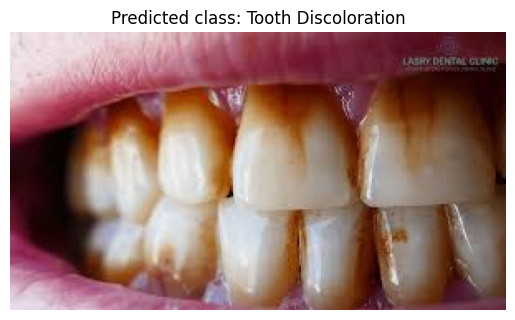

({'Calculus': 0,
  'Data caries': 1,
  'Gingivitis': 2,
  'Mouth Ulcer': 3,
  'Tooth Discoloration': 4,
  'hypodontia': 5},
 'Tooth Discoloration')

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


model = tf.keras.models.load_model(r"/content/drive/My Drive/your_dataset_folder/disease_model.h5")

def predict_disease(img_path, generator):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Predict the class
    prediction = model.predict(img_array)
    predicted_class_idx = prediction.argmax()

    # Get the class indices from the generator
    class_indices = generator.class_indices

    # Get the class names in order of their indices
    class_names = [key for key, value in sorted(class_indices.items(), key=lambda item: item[1])]

    # Print the class indices and predicted class name
    print(f'Class indices: {class_indices}')
    print(f'Predicted class: {class_names[predicted_class_idx]}')

    # Display the image
    plt.imshow(image.load_img(img_path))
    plt.title(f'Predicted class: {class_names[predicted_class_idx]}')
    plt.axis('off')
    plt.show()

    return class_indices, class_names[predicted_class_idx]


train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Example usage
img_path = r"C:\Users\sajal\Desktop\images (2).jpg"
predict_disease(img_path, train_generator)


Found 9325 images belonging to 6 classes.
1/1 [==============================] - 3s 3s/step
Class indices: {'Calculus': 0, 'Data caries': 1, 'Gingivitis': 2, 'Mouth Ulcer': 3, 'Tooth Discoloration': 4, 'hypodontia': 5}
Predicted class: Mouth Ulcer


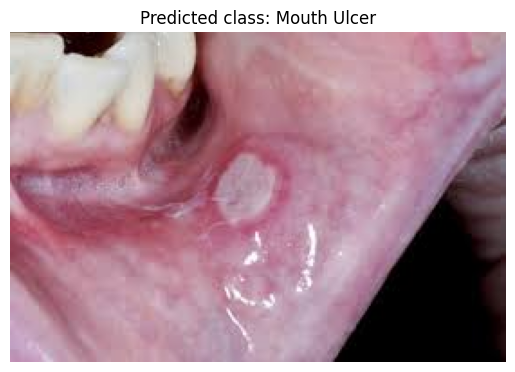

({'Calculus': 0,
  'Data caries': 1,
  'Gingivitis': 2,
  'Mouth Ulcer': 3,
  'Tooth Discoloration': 4,
  'hypodontia': 5},
 'Mouth Ulcer')

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load your trained model
model = tf.keras.models.load_model(r"/content/drive/My Drive/your_dataset_folder/disease_model.h5")

def predict_disease(img_path, generator):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Predict the class
    prediction = model.predict(img_array)
    predicted_class_idx = prediction.argmax()

    # Get the class indices from the generator
    class_indices = generator.class_indices

    # Get the class names in order of their indices
    class_names = [key for key, value in sorted(class_indices.items(), key=lambda item: item[1])]

    # Print the class indices and predicted class name
    print(f'Class indices: {class_indices}')
    print(f'Predicted class: {class_names[predicted_class_idx]}')

    # Display the image
    plt.imshow(image.load_img(img_path))
    plt.title(f'Predicted class: {class_names[predicted_class_idx]}')
    plt.axis('off')
    plt.show()

    return class_indices, class_names[predicted_class_idx]


train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Example usage
img_path = r"C:\Users\sajal\Downloads\mouthulcerimg.jpg"
predict_disease(img_path, train_generator)


Found 9325 images belonging to 6 classes.
1/1 [==============================] - 6s 6s/step
Class indices: {'Calculus': 0, 'Data caries': 1, 'Gingivitis': 2, 'Mouth Ulcer': 3, 'Tooth Discoloration': 4, 'hypodontia': 5}
Predicted class: hypodontia


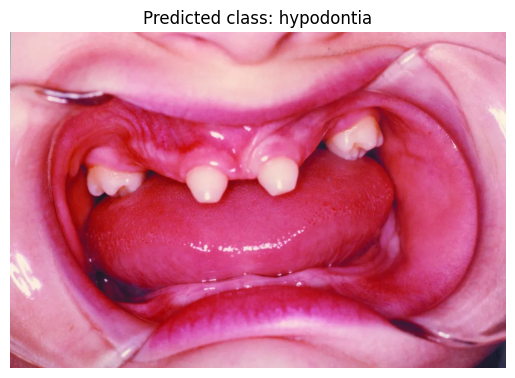

({'Calculus': 0,
  'Data caries': 1,
  'Gingivitis': 2,
  'Mouth Ulcer': 3,
  'Tooth Discoloration': 4,
  'hypodontia': 5},
 'hypodontia')

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load your trained model
model = tf.keras.models.load_model(r"/content/drive/My Drive/your_dataset_folder/disease_model.h5")

def predict_disease(img_path, generator):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Predict the class
    prediction = model.predict(img_array)
    predicted_class_idx = prediction.argmax()


    class_indices = generator.class_indices

    # Get the class names in order of their indices
    class_names = [key for key, value in sorted(class_indices.items(), key=lambda item: item[1])]

    # Print the class indices and predicted class name
    print(f'Class indices: {class_indices}')
    print(f'Predicted class: {class_names[predicted_class_idx]}')

    # Display the image
    plt.imshow(image.load_img(img_path))
    plt.title(f'Predicted class: {class_names[predicted_class_idx]}')
    plt.axis('off')
    plt.show()

    return class_indices, class_names[predicted_class_idx]


train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)


img_path = r"C:\Users\sajal\Downloads\Missing-Teeth-2.webp"
predict_disease(img_path, train_generator)


Found 9325 images belonging to 6 classes.
1/1 [==============================] - 3s 3s/step
Class indices: {'Calculus': 0, 'Data caries': 1, 'Gingivitis': 2, 'Mouth Ulcer': 3, 'Tooth Discoloration': 4, 'hypodontia': 5}
Predicted class: Gingivitis


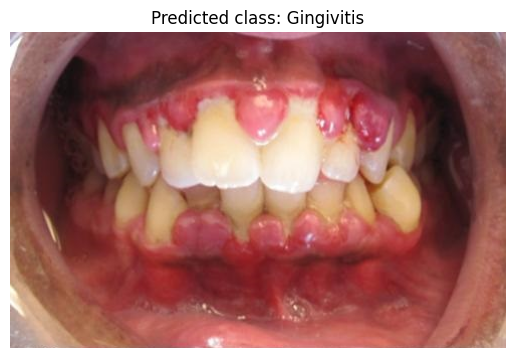

({'Calculus': 0,
  'Data caries': 1,
  'Gingivitis': 2,
  'Mouth Ulcer': 3,
  'Tooth Discoloration': 4,
  'hypodontia': 5},
 'Gingivitis')

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load your trained model
model = tf.keras.models.load_model(r"/content/drive/My Drive/your_dataset_folder/disease_model.h5")

def predict_disease(img_path, generator):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Predict the class
    prediction = model.predict(img_array)
    predicted_class_idx = prediction.argmax()

    # Get the class indices from the generator
    class_indices = generator.class_indices

    # Get the class names in order of their indices
    class_names = [key for key, value in sorted(class_indices.items(), key=lambda item: item[1])]

    # Print the class indices and predicted class name
    print(f'Class indices: {class_indices}')
    print(f'Predicted class: {class_names[predicted_class_idx]}')

    # Display the image
    plt.imshow(image.load_img(img_path))
    plt.title(f'Predicted class: {class_names[predicted_class_idx]}')
    plt.axis('off')
    plt.show()

    return class_indices, class_names[predicted_class_idx]


train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Example usage
img_path = r"C:\Users\sajal\Downloads\Gingivitis_(crop) (1).jpg"
predict_disease(img_path, train_generator)


Found 9325 images belonging to 6 classes.
1/1 [==============================] - 5s 5s/step
Class indices: {'Calculus': 0, 'Data caries': 1, 'Gingivitis': 2, 'Mouth Ulcer': 3, 'Tooth Discoloration': 4, 'hypodontia': 5}
Predicted class: Data caries


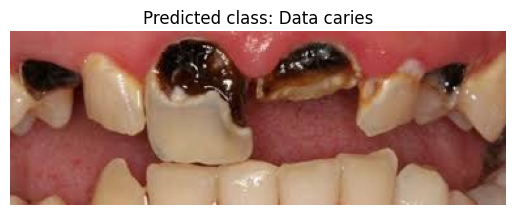

({'Calculus': 0,
  'Data caries': 1,
  'Gingivitis': 2,
  'Mouth Ulcer': 3,
  'Tooth Discoloration': 4,
  'hypodontia': 5},
 'Data caries')

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load your trained model
model = tf.keras.models.load_model(r"/content/drive/My Drive/your_dataset_folder/disease_model.h5")

def predict_disease(img_path, generator):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Predict the class
    prediction = model.predict(img_array)
    predicted_class_idx = prediction.argmax()

    # Get the class indices from the generator
    class_indices = generator.class_indices

    # Get the class names in order of their indices
    class_names = [key for key, value in sorted(class_indices.items(), key=lambda item: item[1])]

    # Print the class indices and predicted class name
    print(f'Class indices: {class_indices}')
    print(f'Predicted class: {class_names[predicted_class_idx]}')

    # Display the image
    plt.imshow(image.load_img(img_path))
    plt.title(f'Predicted class: {class_names[predicted_class_idx]}')
    plt.axis('off')
    plt.show()

    return class_indices, class_names[predicted_class_idx]


train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True
)


img_path = r"C:\Users\sajal\Downloads\images (5).jpg"
predict_disease(img_path, train_generator)
